In [58]:
library(tidyverse)
library(magrittr)
options(repr.plot.width=15, repr.plot.height=20)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Python data load 

In [8]:
py_csa_sphere = 
    readr::read_csv("../../Python/csa-sphere.csv") %>%
    dplyr::mutate(eval = "Sphere")
py_csa_linear = 
    readr::read_csv("../../Python/csa-linear.csv") %>%
    dplyr::mutate(eval = "Linear")
py_csa_griewank = 
    readr::read_csv("../../Python/csa-griewank.csv") %>%
    dplyr::mutate(eval = "Griewank")

pycsa_data = list(py_csa_sphere, py_csa_linear, py_csa_griewank) %>%
    purrr::map(function(df) {
        df %>% dplyr::mutate(
            t = iter,
            label = "Python"
        ) %>%
        dplyr::select(t, sigma, best_fit, label, eval)
    }) %>% purrr::reduce(dplyr::bind_rows)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  iter = col_double(),
  sigma = col_double(),
  best_fit = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  iter = col_double(),
  sigma = col_double(),
  best_fit = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  iter = col_double(),
  sigma = col_double(),
  best_fit = col_double()
)




In [9]:
py_ppmf_sphere = 
    readr::read_csv("../../Python/ppmf-sphere.csv") %>%
    dplyr::mutate(eval = "Sphere")
py_ppmf_linear = 
    readr::read_csv("../../Python/ppmf-linear.csv") %>%
    dplyr::mutate(eval = "Linear")
py_ppmf_griewank = 
    readr::read_csv("../../Python/ppmf-griewank.csv") %>%
    dplyr::mutate(eval = "Griewank")

pyppmf_data = list(py_ppmf_sphere, py_ppmf_linear, py_ppmf_griewank) %>%
    purrr::map(function(df) {
        df %>% dplyr::mutate(
            t = iter,
            label = "Python"
        ) %>%
        dplyr::select(t, sigma, best_fit, label, eval)
    }) %>% purrr::reduce(dplyr::bind_rows)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  iter = col_double(),
  sigma = col_double(),
  best_fit = col_double(),
  mean_fit = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  iter = col_double(),
  sigma = col_double(),
  best_fit = col_double(),
  mean_fit = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  iter = col_double(),
  sigma = col_double(),
  best_fit = col_double(),
  mean_fit = col_double()
)




# R data 

In [12]:
source("../../R/alg/cma-es-csa.R")
source("../../R/alg/cma-es-expth.R")
source("../../R/eval-funcs.R")

In [44]:
csa_sphere = cma_es_csa(rep(100, 10), fn = sphere_func, lower = -100, upper = 100, control = list(stopfitness = 10^(-20)))
csa_sphere$diagnostic$eval = "Sphere"
csa_linear = cma_es_csa(rep(100, 10), fn = linear_func, lower = -100, upper = 100, control = list(stopfitness = 10^(-20)))
csa_linear$diagnostic$eval = "Linear"
csa_griewank = cma_es_csa(rep(100, 10), fn = griewank_func, lower = -100, upper = 100, control = list(stopfitness = 10^(-20)))
csa_griewank$diagnostic$eval = "Griewank"

In [45]:
csa_data =
    list(csa_sphere$diagnostic, csa_linear$diagnostic, csa_griewank$diagnostic) %>%
     purrr::map(function(df) {
        dfx =
            tibble::tibble(
                sigma = df$sigma,
                best_fit = df$bestVal,
                label = "R",
                eval = df$eval
            )
         dfx %<>% dplyr::mutate(t = 1:dplyr::n())
    }) %>% purrr::reduce(dplyr::bind_rows)

In [46]:
ppmf_sphere = cma_es_ppmf(rep(100, 10), fn = sphere_func, lower = -100, upper = 100, control = list(stopfitness = 10^(-20)))
ppmf_sphere$diagnostic$eval = "Sphere"
ppmf_linear = cma_es_ppmf(rep(100, 10), fn = linear_func, lower = -100, upper = 100, control = list(stopfitness = 10^(-20)))
ppmf_linear$diagnostic$eval = "Linear"
ppmf_griewank = cma_es_ppmf(rep(100, 10), fn = griewank_func, lower = -100, upper = 100, control = list(stopfitness = 10^(-20)))
ppmf_griewank$diagnostic$eval = "Griewank"

In [47]:
ppmf_data =
    list(ppmf_sphere$diagnostic, ppmf_linear$diagnostic, ppmf_griewank$diagnostic) %>%
     purrr::map(function(df) {
        dfx =
            tibble::tibble(
                sigma = df$sigma,
                best_fit = df$bestVal,
                label = "R",
                eval = df$eval
            )
         dfx %<>% dplyr::mutate(t = 1:dplyr::n())
    }) %>% purrr::reduce(dplyr::bind_rows)

# Py-R data

In [48]:
all_csa = 
    dplyr::bind_rows(csa_data, pycsa_data)
all_ppmf = 
    dplyr::bind_rows(ppmf_data, pyppmf_data)

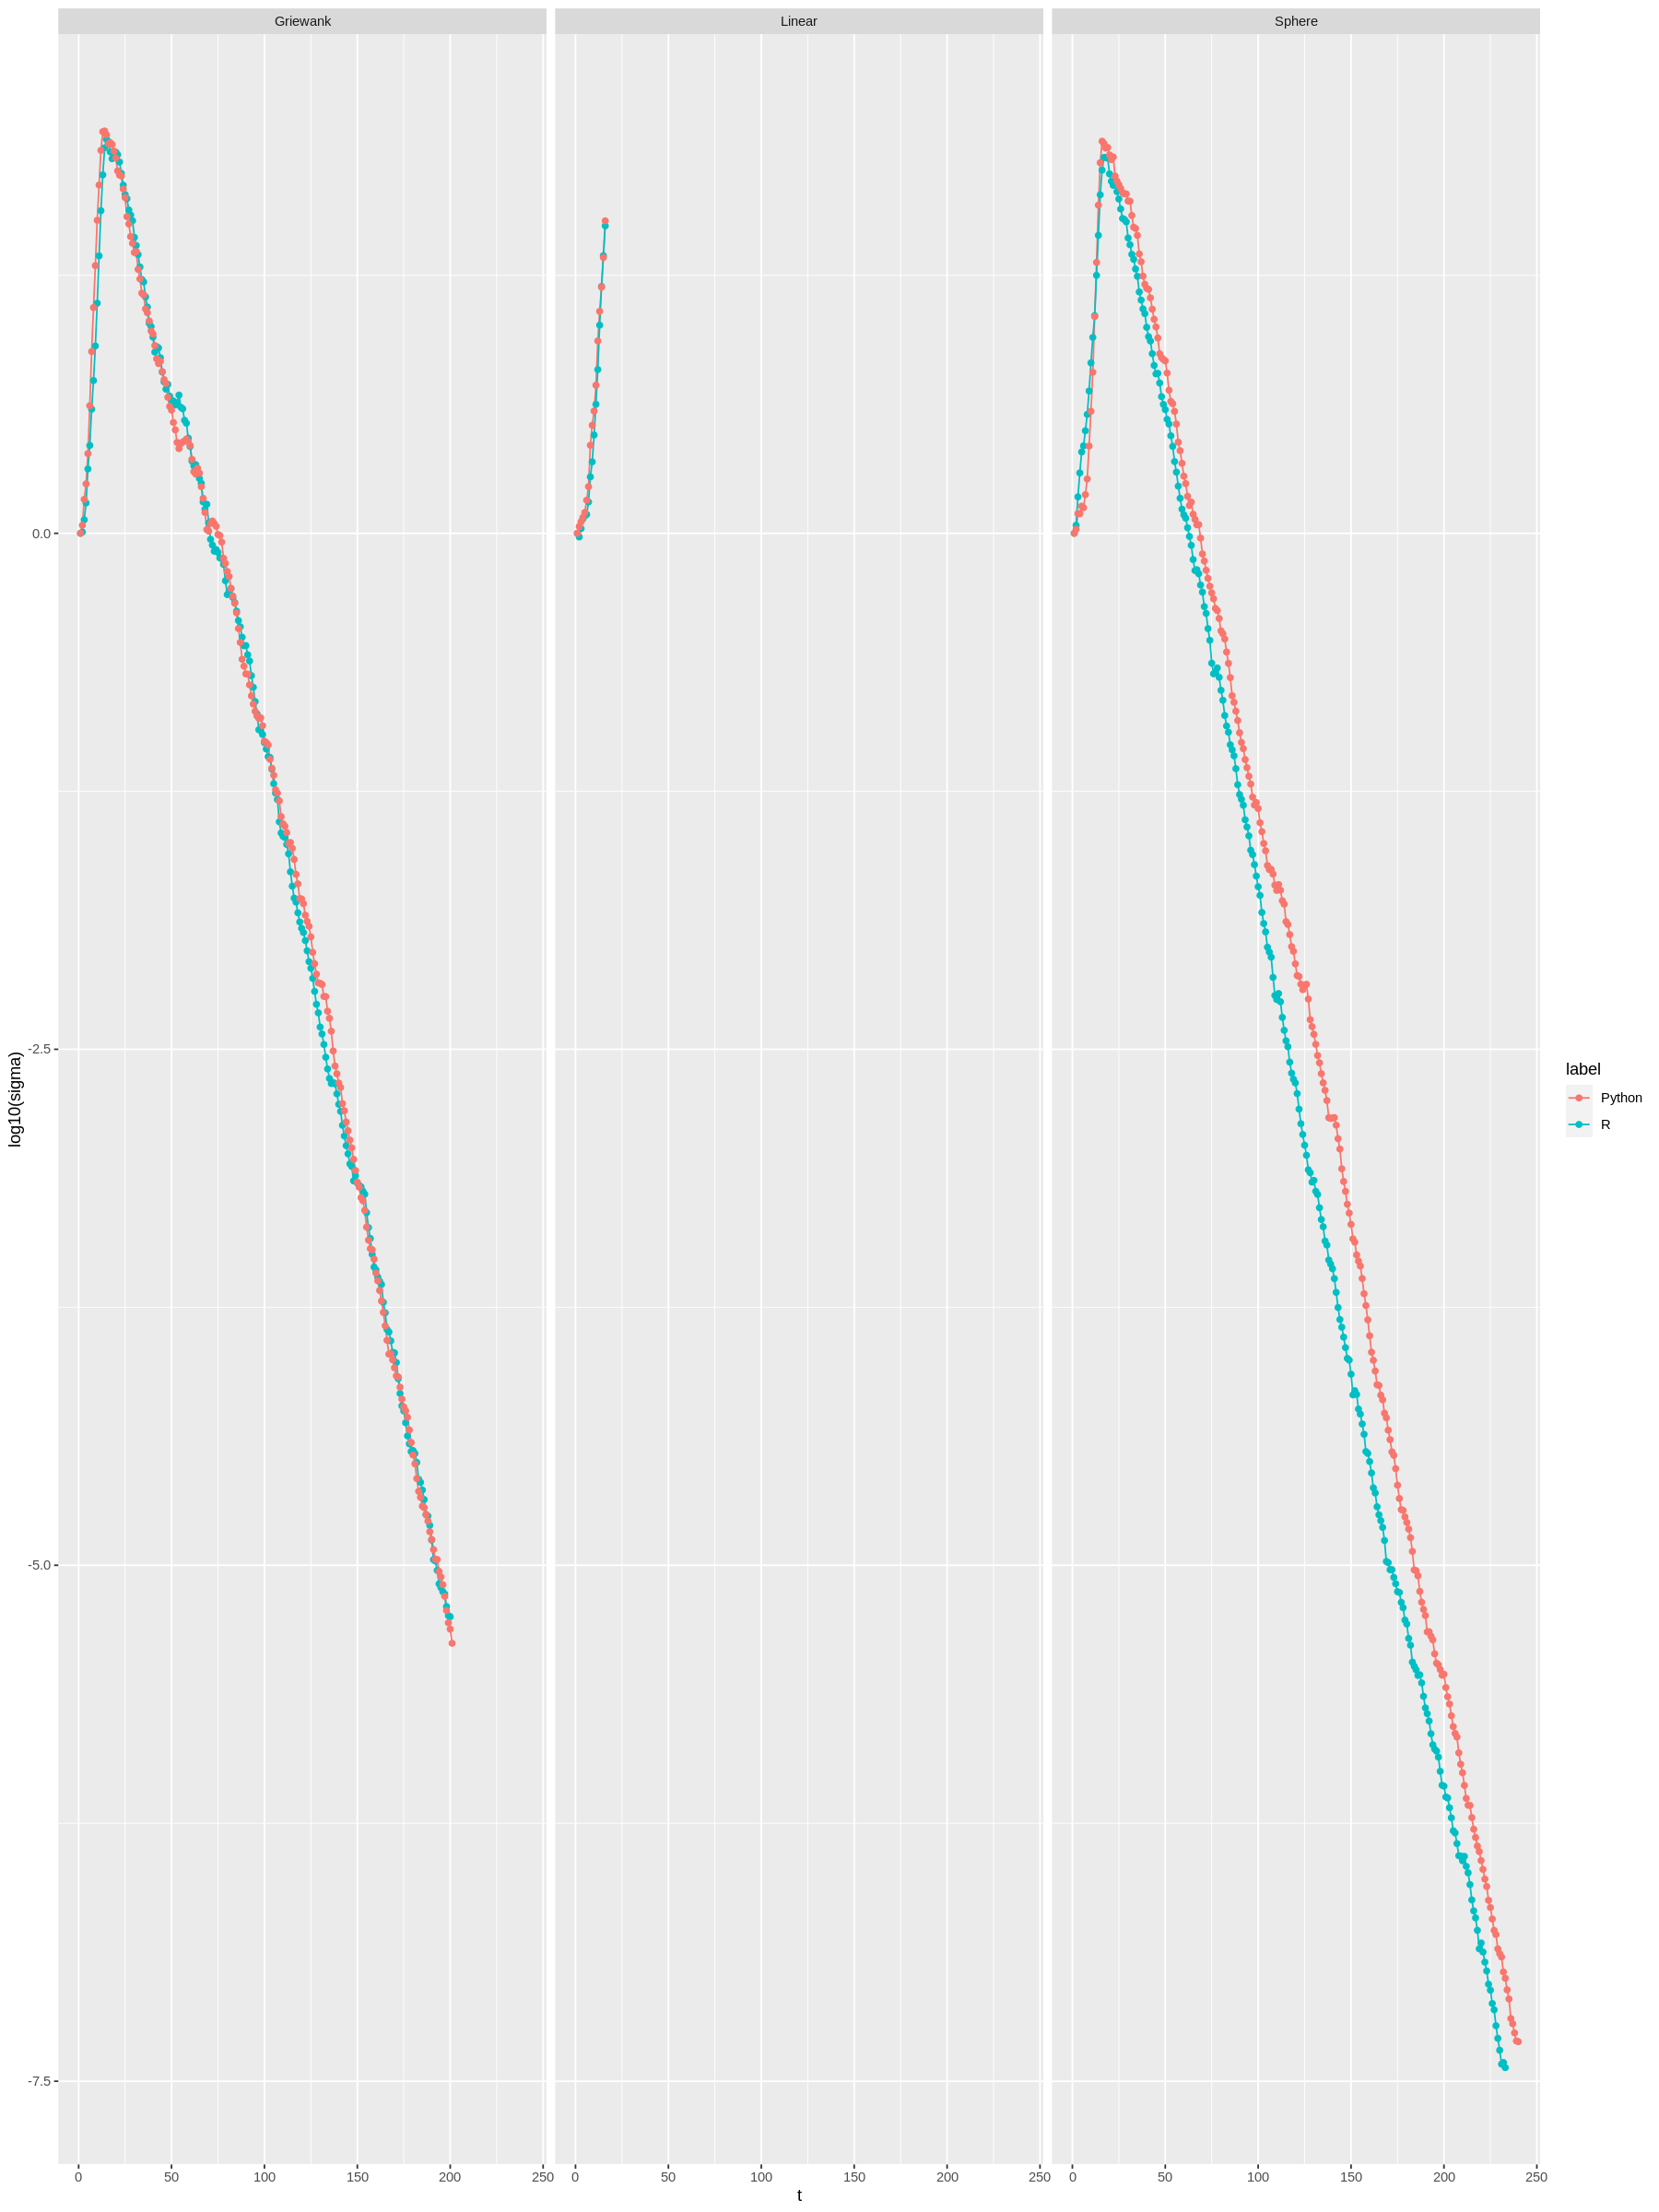

In [53]:
all_csa %>% 
    ggplot2::ggplot(aes(x = t, y = log10(sigma), col = label)) + geom_line() + geom_point() + facet_wrap( ~ eval)

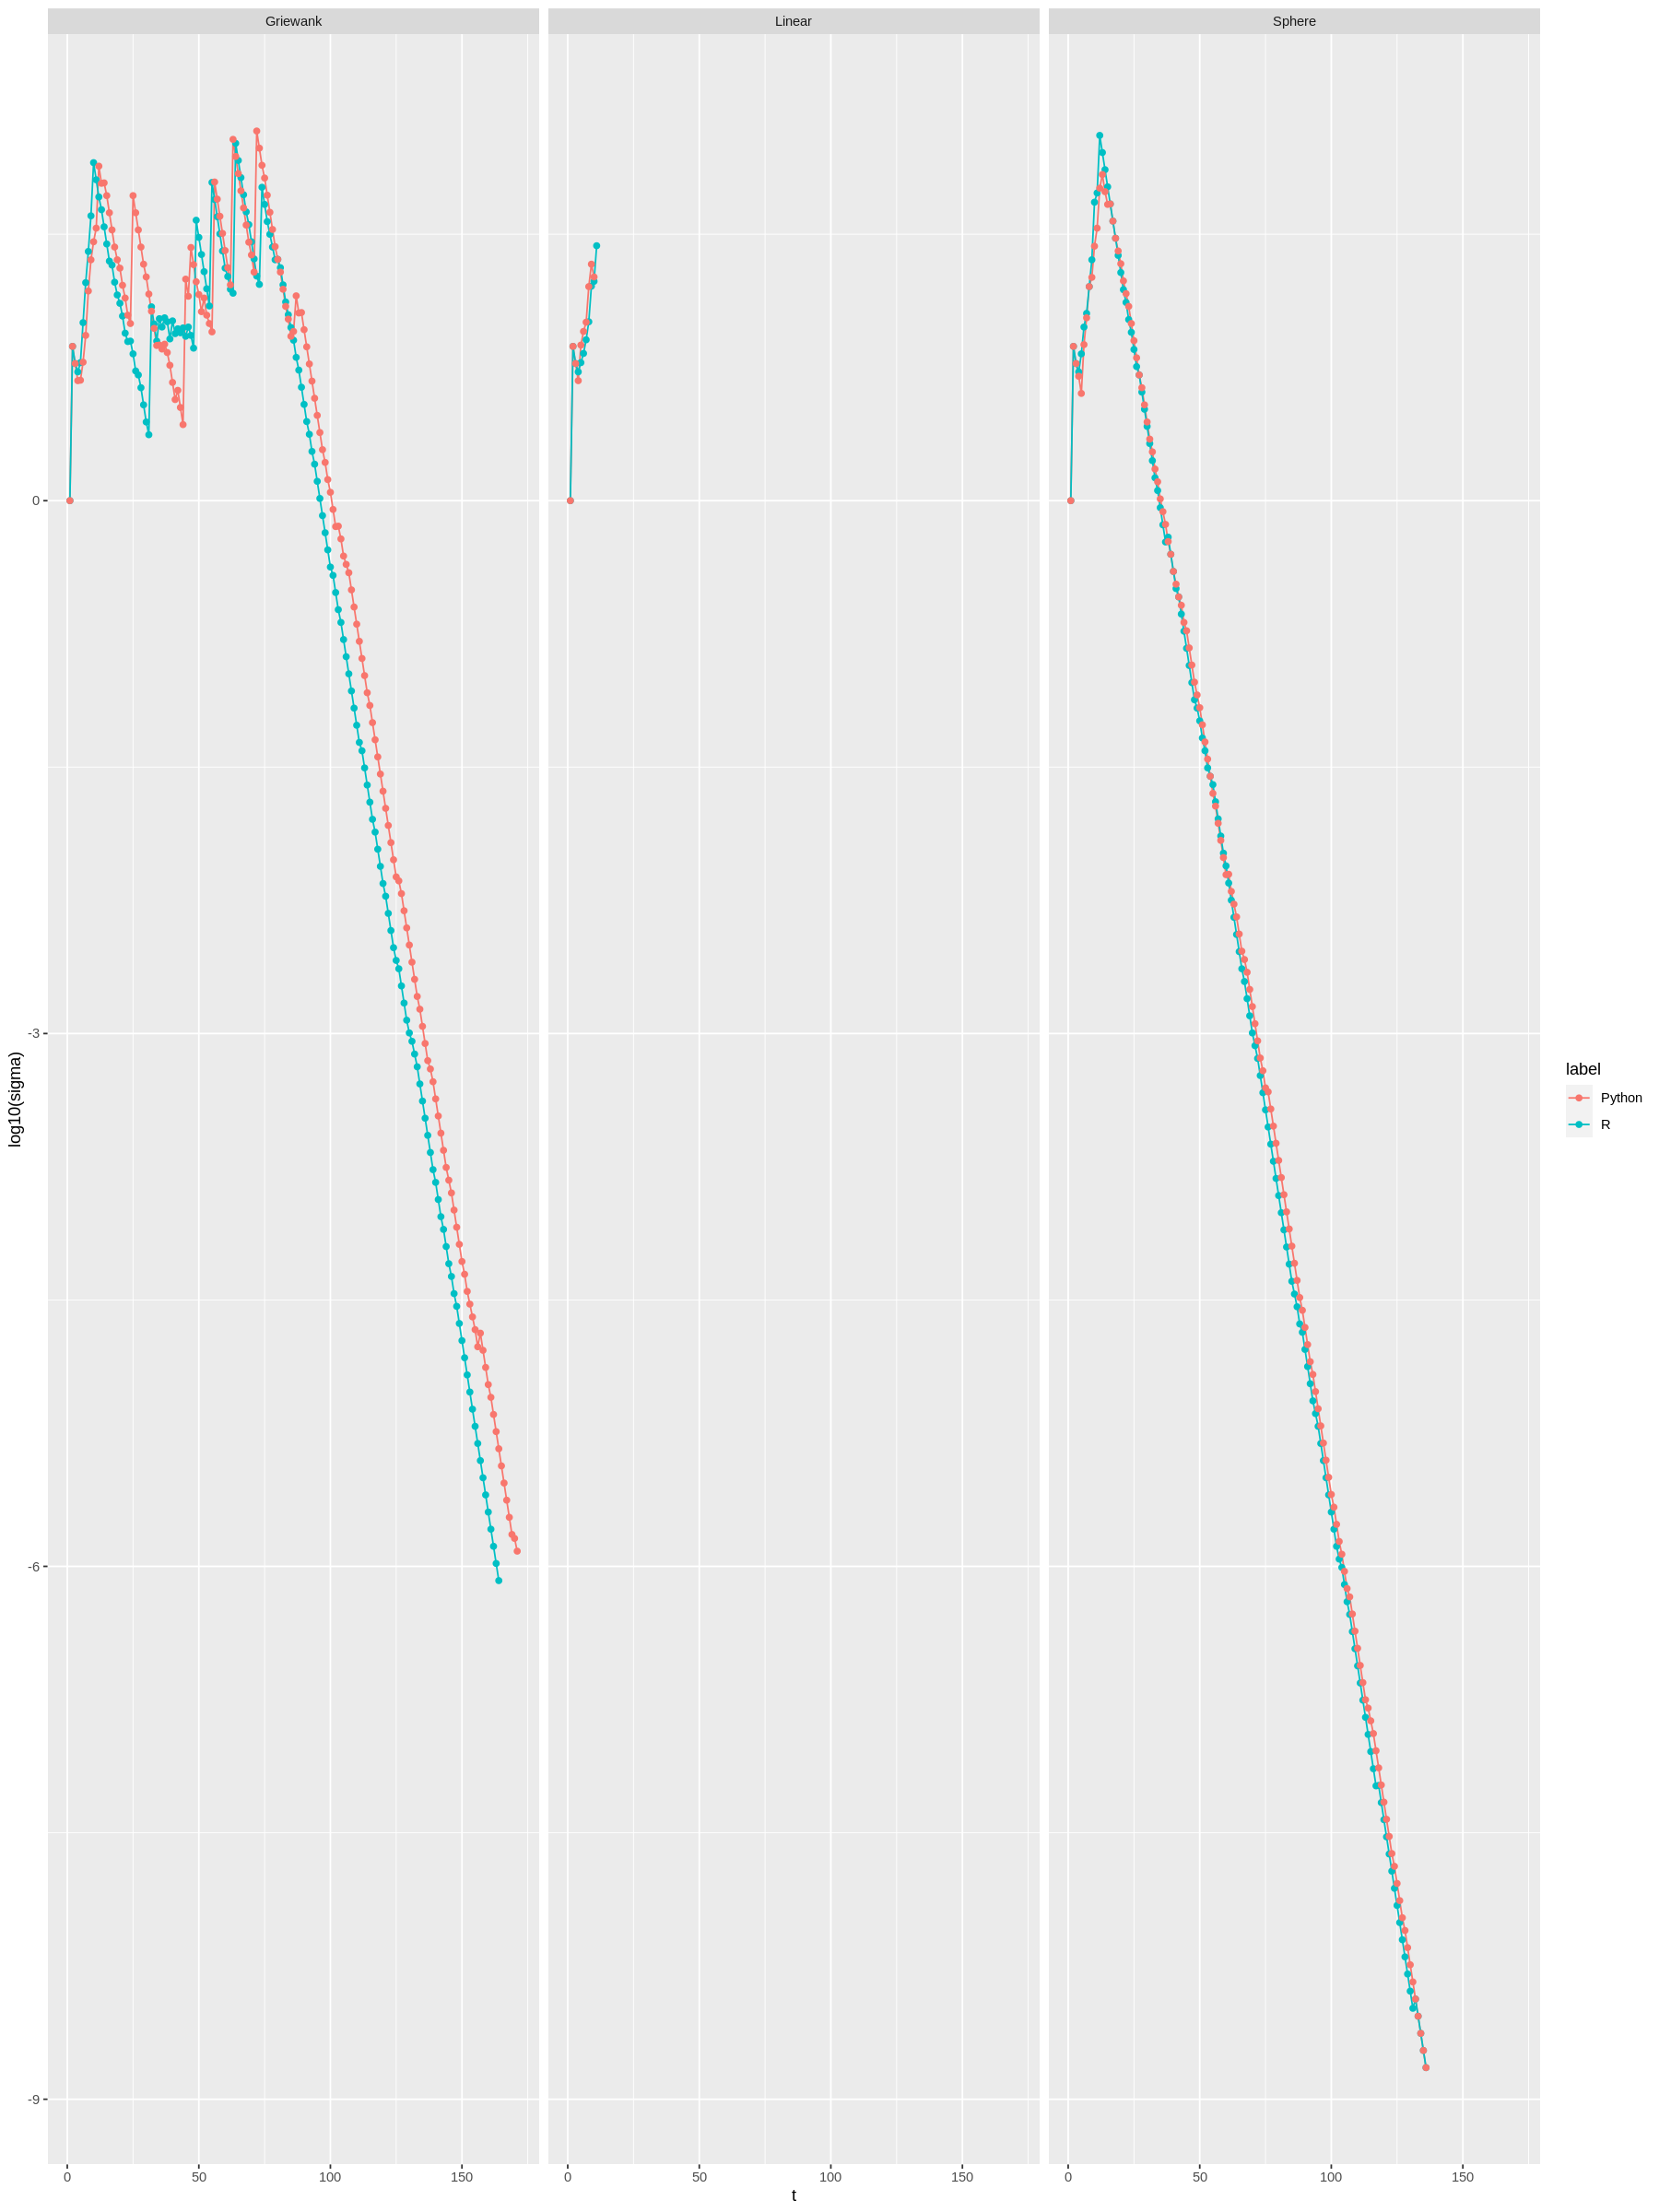

In [54]:
all_ppmf %>%
    ggplot2::ggplot(aes(x = t, y = log10(sigma), col = label)) + geom_line() + geom_point() + facet_wrap( ~ eval)

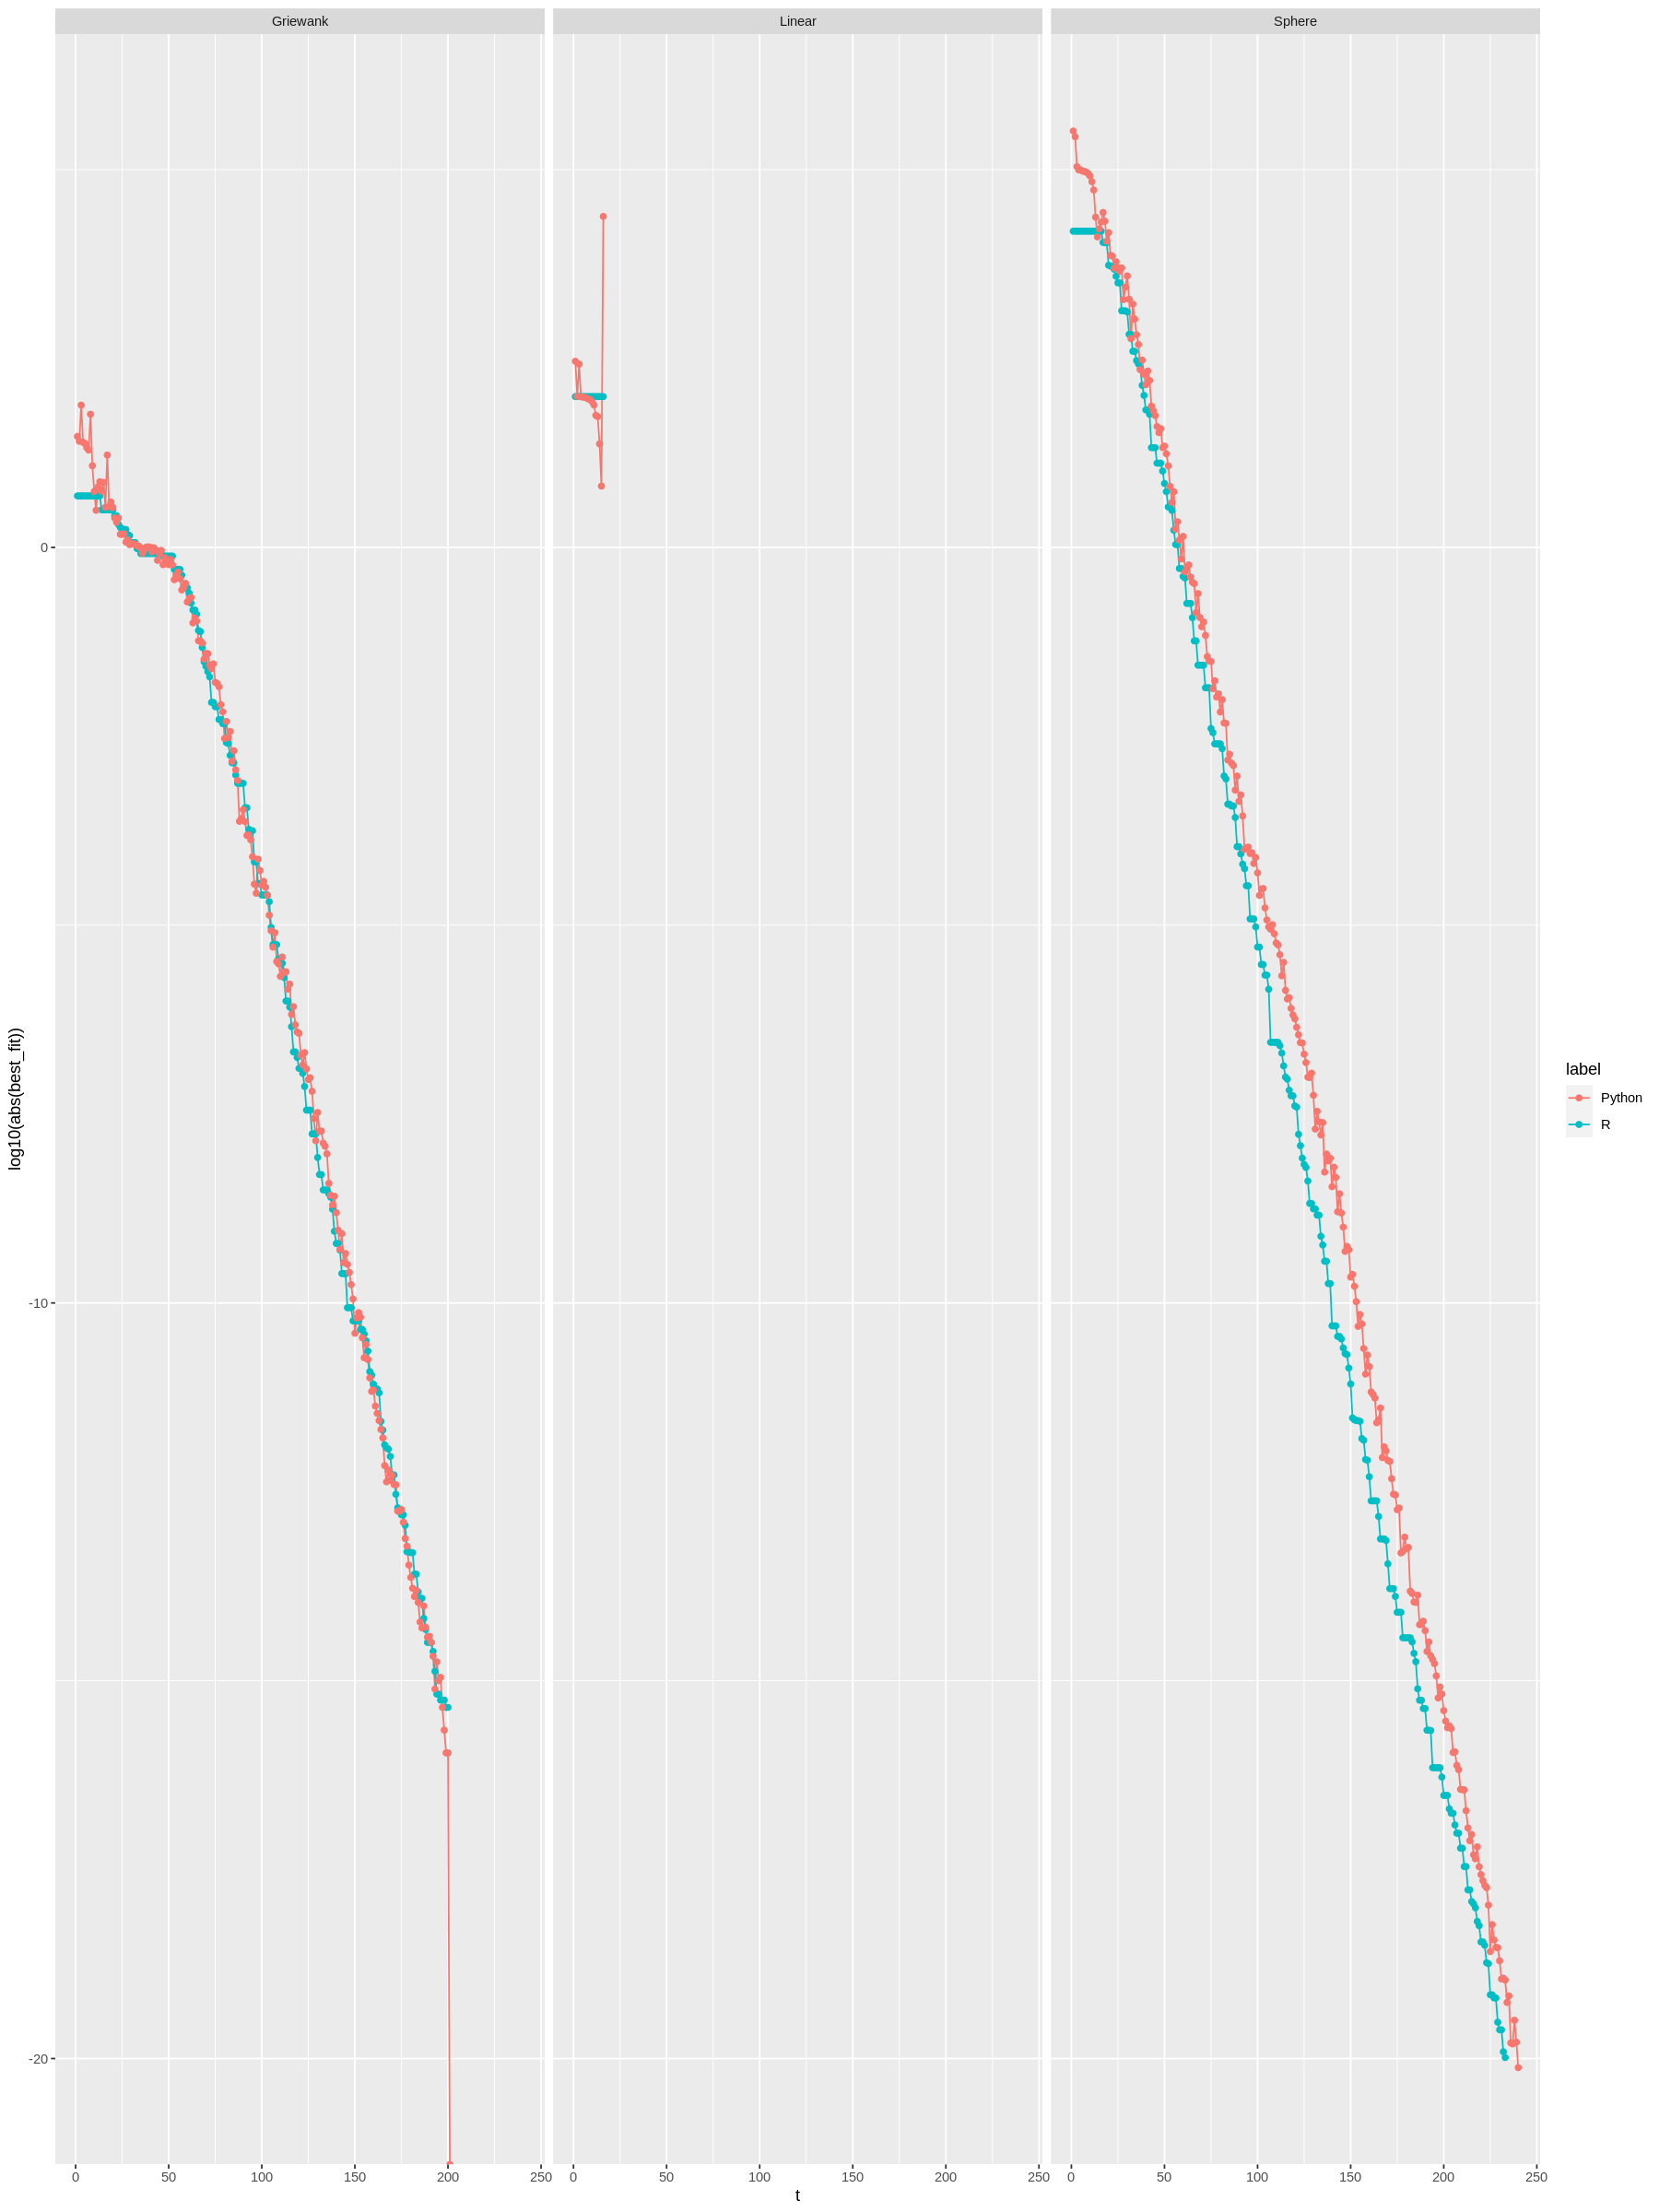

In [56]:
all_csa %>% 
    ggplot2::ggplot(aes(x = t, y = log10(abs(best_fit)), col = label)) + geom_line() + geom_point() + facet_wrap( ~ eval)

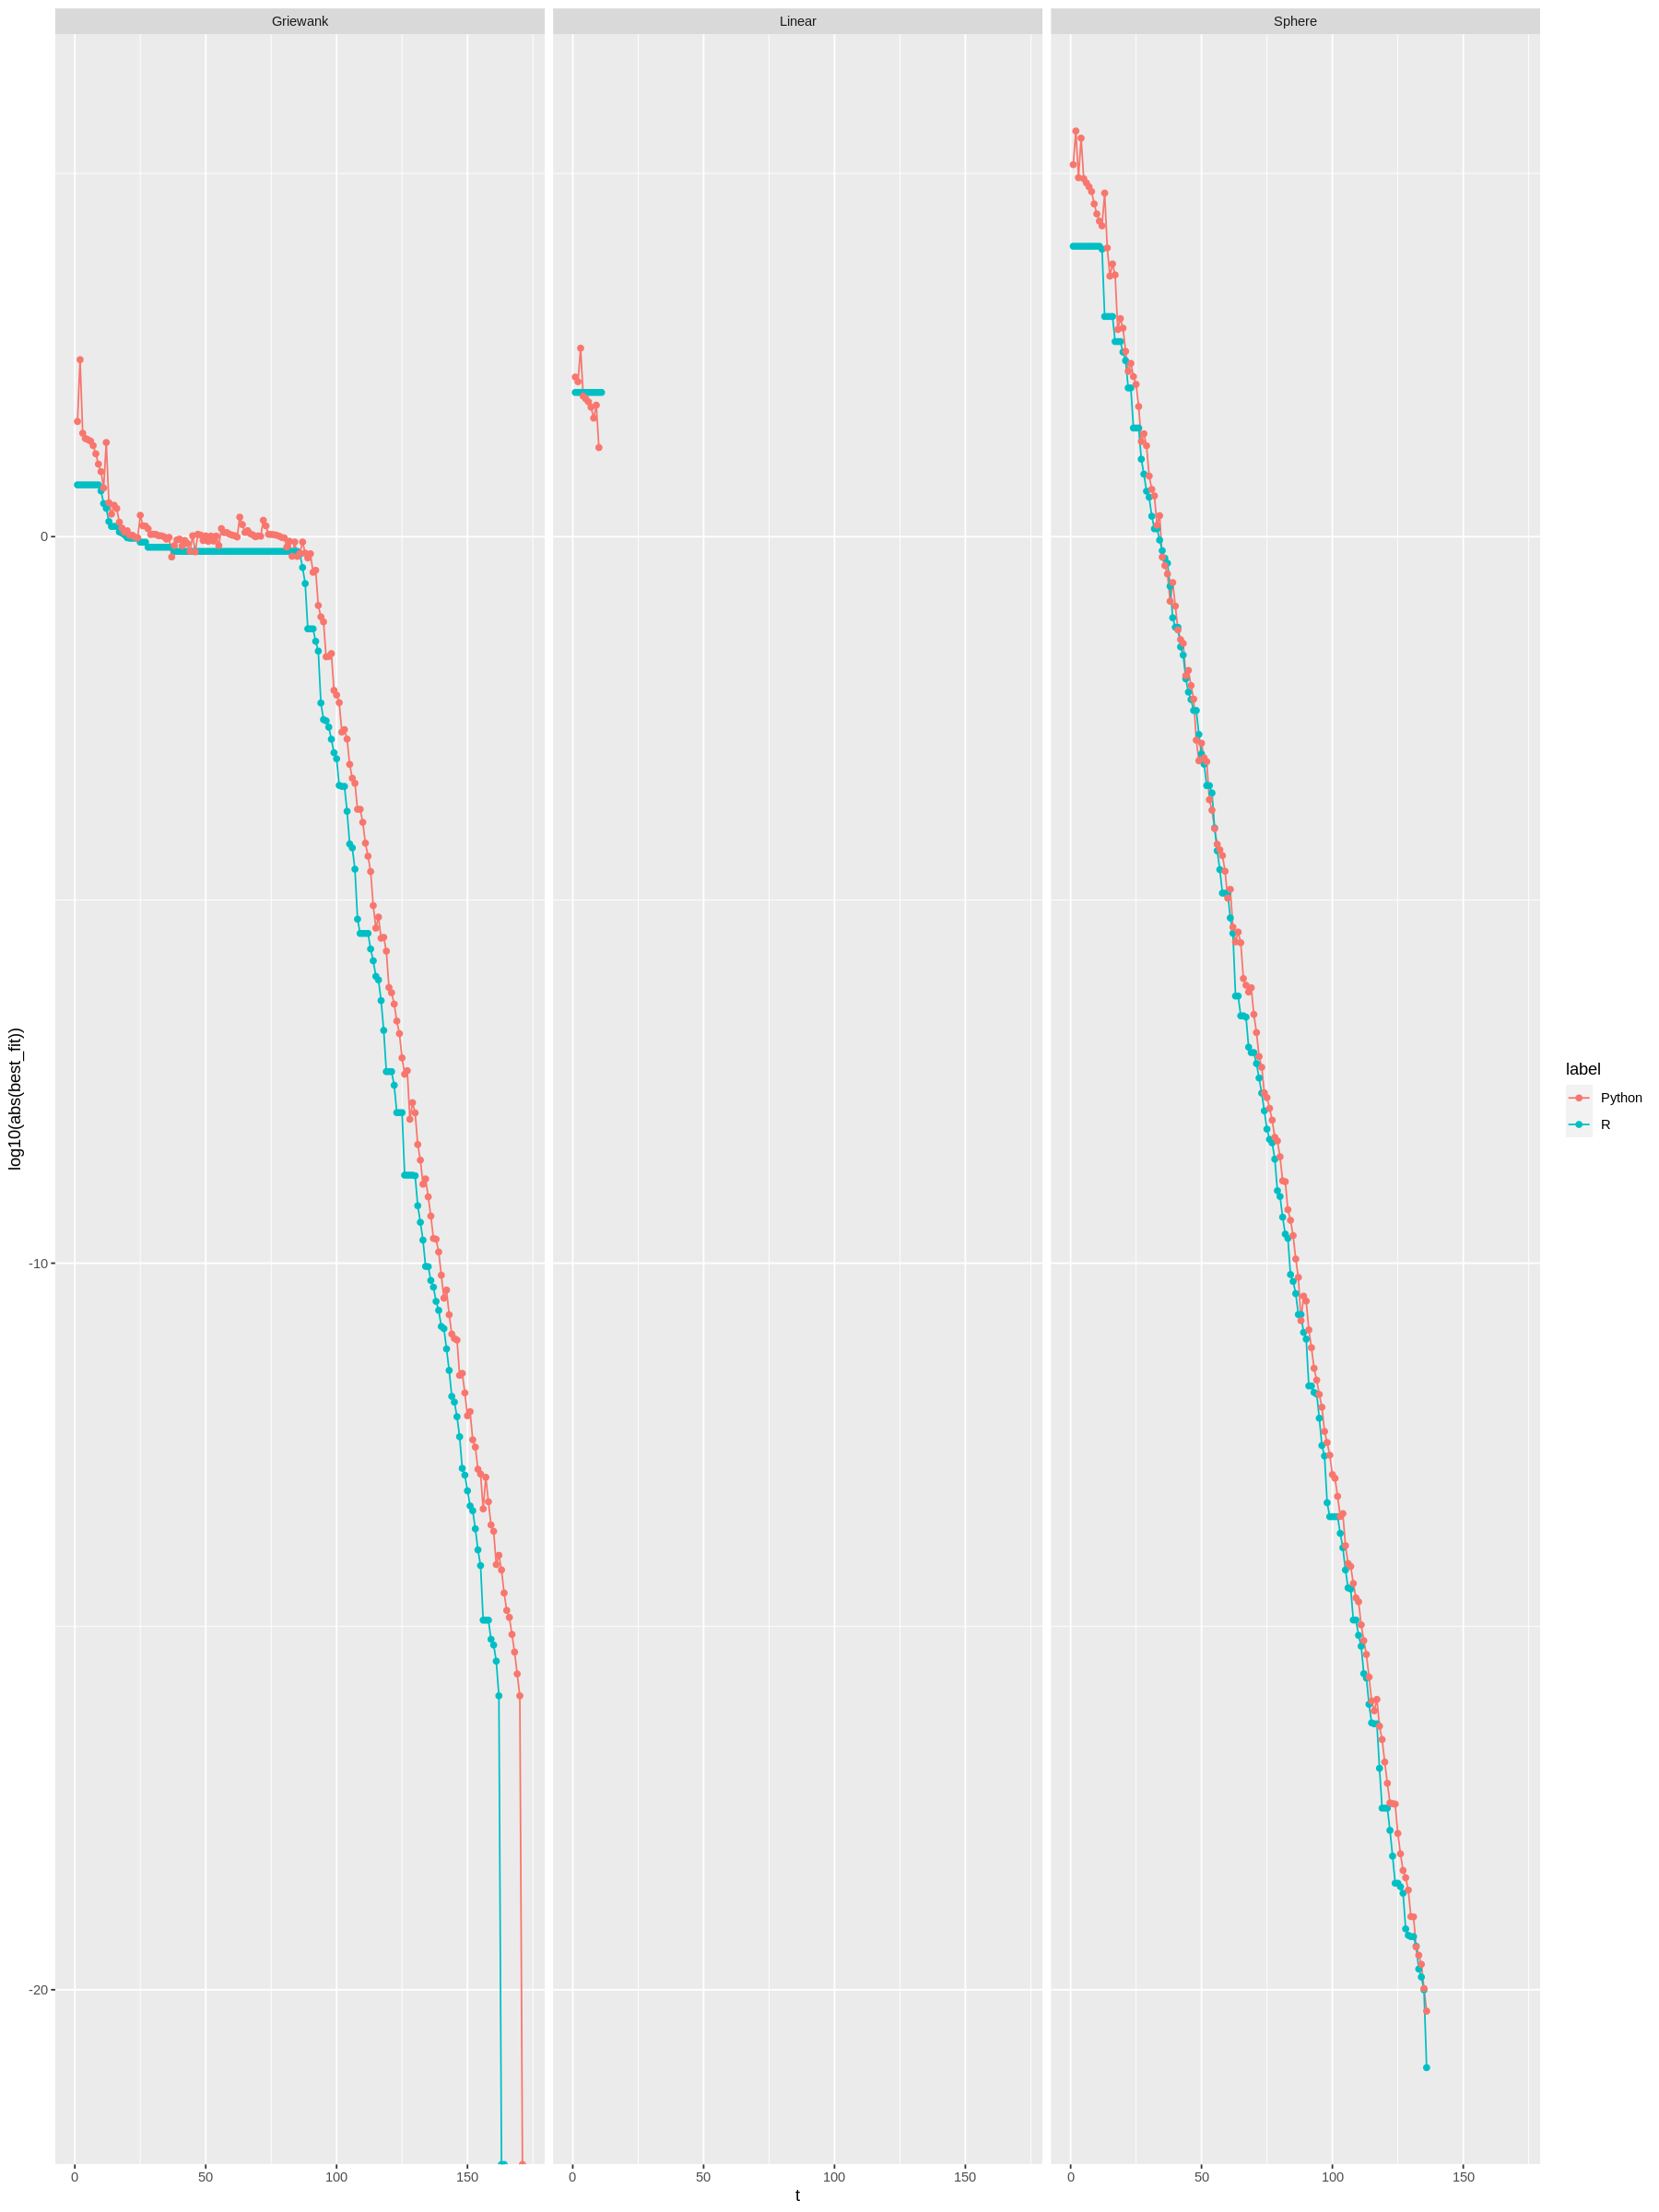

In [57]:
all_ppmf %>% 
    ggplot2::ggplot(aes(x = t, y = log10(abs(best_fit)), col = label)) + geom_line() + geom_point() + facet_wrap( ~ eval)